# 7: Ensemble Learning and Random Forests
1. Five different models with 95% accuracy. If models do not consistently get same wrong results, this can result in a better model than any of the individual ones.
1. Hard voting means every model gets the same proportionality of vote as every other model, whereas soft voting means some weight is given to models that are more confident about an outcome.
1. Yes, in general, all ensemble methods scale extremely well across procs and machines.
1. OOB is like a free validation test.
1. Extra randomness is achieved in Extra-Trees by not ensuring "best" splits--instead, this step is randomized. It is also computationally less intensive since this is the most expensive part for RF. 
1. With AdaBoost, altering learning rate will drastically affect under/over fitting
1. Decrease learning rate to prevent over fitting

## MNIST Ensemble Classification

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import sys
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml

In [4]:
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
X, y = mnist['data'], mnist['target']
y = y.astype(np.uint8)
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
print(X.shape, y.shape)

(70000, 784) (70000,)


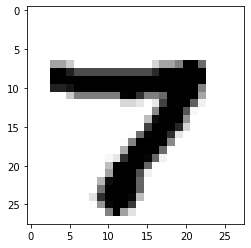

In [6]:
plt.imshow(X[np.random.randint(0, 70000)].reshape(28, 28), cmap='binary')

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix, 
    precision_score, 
    recall_score, 
    f1_score, 
    precision_recall_curve,
    roc_curve
)

In [25]:
clf_rf = RandomForestClassifier(random_state=42, n_estimators=40, n_jobs=-1)
cross_val_score(clf_rf, X_train, y_train, cv=6, scoring="accuracy")

array([0.9664, 0.9625, 0.9615, 0.9618, 0.9603, 0.9687])

In [41]:
clf_rf.fit(X_train, y_train)
preds_rf = clf_rf.predict(X_test)

In [42]:
confusion_matrix(preds_rf, y_test)

array([[ 970,    0,    8,    1,    0,    5,    7,    1,    5,    7],
       [   0, 1125,    1,    0,    0,    1,    3,    3,    0,    6],
       [   2,    2,  993,   13,    0,    3,    1,   23,    5,    1],
       [   0,    4,    8,  969,    1,   11,    0,    5,   13,   14],
       [   0,    0,    5,    0,  952,    1,    4,    0,    5,   13],
       [   2,    1,    1,    9,    0,  862,    4,    0,    7,    3],
       [   2,    1,    2,    0,    6,    3,  932,    0,    5,    1],
       [   1,    0,    8,    9,    0,    1,    0,  982,    2,    6],
       [   2,    1,    6,    8,    5,    4,    7,    3,  923,    4],
       [   1,    1,    0,    1,   18,    1,    0,   11,    9,  954]])

In [29]:
from sklearn.ensemble import ExtraTreesClassifier

clf_et = ExtraTreesClassifier(random_state=42, n_estimators=40, n_jobs=-1)
cross_val_score(clf_et, X_train, y_train, cv=6, scoring="accuracy")

array([0.9682, 0.9651, 0.9671, 0.9649, 0.961 , 0.9735])

In [44]:
clf_et.fit(X_train, y_train)
preds_et = clf_et.predict(X_test)

In [30]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

clf_svm = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf_svm.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [46]:
preds_svm = clf_svm.predict(X_test)

In [36]:
from sklearn.ensemble import VotingClassifier

clf_voting = VotingClassifier(
    estimators=[('clf_rf', clf_rf), ('clf_et', clf_et), ('clf_svm', clf_svm)],
    voting='hard',
    n_jobs=-1
)

In [37]:
clf_voting.fit(X_train, y_train)

VotingClassifier(estimators=[('clf_rf',
                              RandomForestClassifier(n_estimators=40, n_jobs=-1,
                                                     random_state=42)),
                             ('clf_et',
                              ExtraTreesClassifier(n_estimators=40, n_jobs=-1,
                                                   random_state=42)),
                             ('clf_svm',
                              Pipeline(steps=[('standardscaler',
                                               StandardScaler()),
                                              ('svc', SVC(gamma='auto'))]))],
                 n_jobs=-1)

In [38]:
preds_voting = clf_voting.predict(X_test)

In [40]:
accuracy_score(preds_voting, y_test)

0.9739

In [43]:
accuracy_score(preds_rf, y_test)

0.9662

In [45]:
accuracy_score(preds_et, y_test)

0.9687

In [ ]:
accuracy_score(preds_svm, y_test)